In [371]:
# import all the libraries
import pandas as pd #read data
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np #ubah jadi array

In [372]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)

Pandas version: 2.0.3
Numpy version: 1.25.2
Seaborn version: 0.13.1
Matplotlib version: 3.7.1


### Import dataset

In [373]:
# read the dataset using pandas
data = pd.read_excel('student_scores.xlsx')
data.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [374]:
# from google.colab import drive
# drive.mount('/content/drive')

# Exploratory Data Analysis

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [376]:
# Statistic of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours (x),25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores (y),25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [377]:
# Calculate the null value, if the value is 0, that is no null or missing value
data.isna().sum()

Hours (x)     0
Scores (y)    0
dtype: int64

In [378]:
# Counts the all column value of dataset
data.value_counts()

Hours (x)  Scores (y)
1.1        17            1
5.1        47            1
8.9        95            1
8.5        75            1
8.3        81            1
7.8        86            1
7.7        85            1
7.4        69            1
6.9        76            1
6.1        67            1
5.9        62            1
5.5        60            1
4.8        54            1
1.5        20            1
4.5        41            1
3.8        35            1
3.5        30            1
3.3        42            1
3.2        27            1
2.7        30            1
           25            1
2.5        30            1
           21            1
1.9        24            1
9.2        88            1
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 400x800 with 0 Axes>

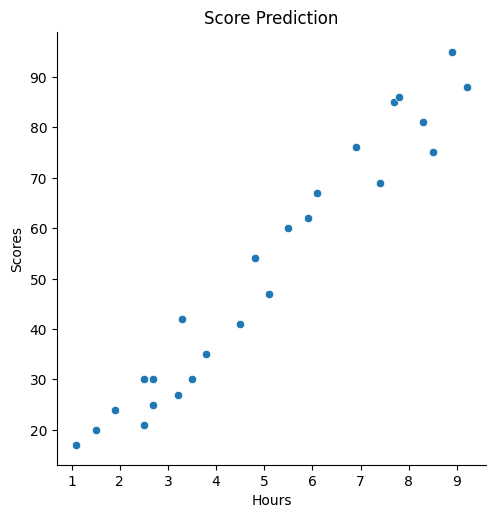

In [379]:
# Plots to make corelation of dataset where they are scattered
plt.figure(figsize=(4,8))
sns.pairplot(data,x_vars=['Hours (x)'],y_vars=['Scores (y)'],size=5,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Score Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

## Investigate of Feature Engineering

In [380]:
# Create a copy dataset for checking duplicate
df = data.copy()
print('Bentuk dataset sebelum di-drop duplikatnya:')
print(df.shape)

# Drop duplicate rows
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before
df = df.drop_duplicates()
print('Bentuk dataset sesudah di-drop duplikatnya:')
print(df.shape)

# Check the duplicate rows
if duplicate_rows_before.empty:
    print('Tidak terdapat duplikat')
else:
    print('Terdapat duplikat')

Bentuk dataset sebelum di-drop duplikatnya:
(25, 2)
Bentuk dataset sesudah di-drop duplikatnya:
(25, 2)
Tidak terdapat duplikat


In [381]:
# Total null value
df.isna().sum()

Hours (x)     0
Scores (y)    0
dtype: int64

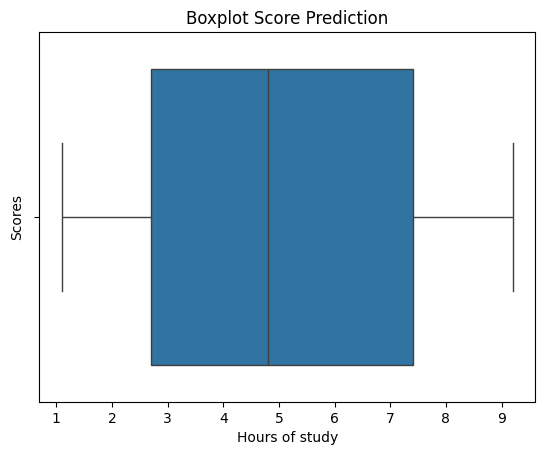

In [382]:
# Outlier Analysis
sns.boxplot(x="Hours (x)", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.title("Boxplot Score Prediction")

# Menampilkan plot
plt.show()

## Dari hasil visualisasi menggunakan Boxplot di atas, tidak terdapat outlier dataset karena tidak ada tanda titik-titik di ujung Boxplotnya

## Split Dataset to make Data Training and Data Testing Before Create the ML Model

In [383]:
#split data
X= data['Hours (x)']
#x=data[data(kolom1,k2,..,kn)]
X.head()


0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours (x), dtype: float64

In [384]:
#scores
Y=data['Scores (y)']
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores (y), dtype: int64

In [385]:
#import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [386]:
#split data train dan test
#data train harus > data test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=42)

In [387]:
!pip install scikit-learn

In [388]:
#import linier regration dari scikit learn
from sklearn.linear_model import LinearRegression

In [389]:
#ubah ke array
X_train=np.array(X_train)[:,np.newaxis]
X_test=np.array(X_test)[:,np.newaxis]


In [390]:
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [391]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [392]:
Y_train

1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores (y), dtype: int64

In [393]:
Y_test

8     81
16    30
0     21
23    76
11    62
9     25
13    42
Name: Scores (y), dtype: int64

# Create a Model ML

### **Linear Regression**

In [394]:
# Latih model regresi linear dengan data yang sudah direshape
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)


LinearRegression()

In [395]:
#evaluasi model ke x test
y_pred = lr_model.predict(X_test)

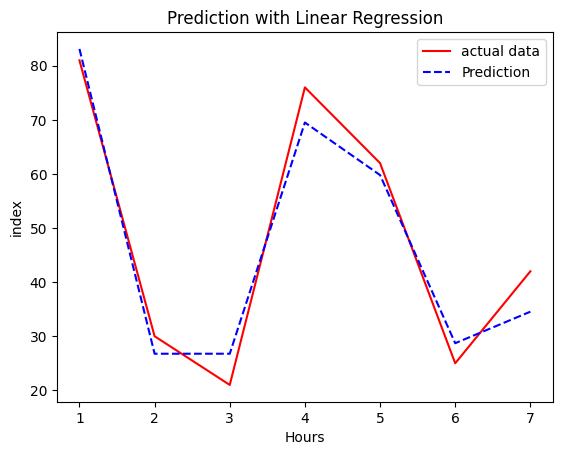

In [396]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c = [i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

# Evaluate the Model

In [397]:
#import metriks dari scikit learn
from sklearn.metrics import r2_score,mean_squared_error

In [398]:
rsq_lr = r2_score(Y_test,y_pred)
print('r Squared linear regression', rsq_lr)

r Squared linear regression 0.9553509219739938


In [399]:
#intercept and koefisien
print('intercept of Linear regression model:',lr_model.intercept_)
print('koefisien of the line Linear regression :',lr_model.coef_)
#y=mx+c
#m=gradien
#x=hours
#c intercept

intercept of Linear regression model: 2.4803670915057623
koefisien of the line Linear regression : [9.71409219]


In [400]:
# x = float(input('Masukkan berapa jam belajar Anda: '))
# prediksi_nilai = 9.71409219*x + 2.4803670915057623
# print('Prediksi Nilai Anda:', prediksi_nilai)

Kesimpulan = Y= 9.71409219 X + 2.4803670915057623

### **Decision Tree**

In [401]:
#bandingkan dengan decision tree
from sklearn.tree import DecisionTreeRegressor

In [402]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [403]:
y_pred_dt = dt_model.predict(X_test)

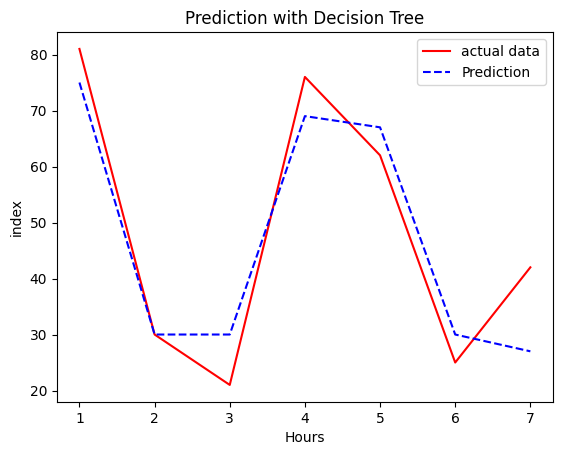

In [404]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

# Evaluate the Model

In [405]:
rsq_dt = r2_score(Y_test,y_pred_dt)
print('r square Desicion Tree result:',rsq_dt)

r square Desicion Tree result: 0.8803859268443893


### **Random Forest**

In [406]:
from sklearn.ensemble import RandomForestRegressor

In [407]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [408]:
y_pred_rf = rf_model.predict(X_test)

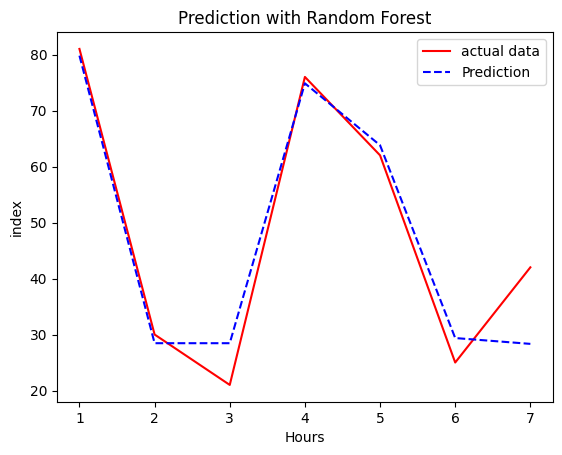

In [409]:
#plot untuk mengetahui apakah prediksi sudah tepat.
#Ytest dibandingkan sama Ypred
c=[i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-',label='actual data')
plt.plot(c,y_pred_rf,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

## Evaluate The Model

In [410]:
rsq_rf = r2_score(Y_test,y_pred_rf)
print('r square Random Forest result: ',rsq_rf)

r square Random Forest result:  0.9268074705517668


## All of models Evaluate Value

In [411]:
print('R Score Linear Regresion =',rsq_lr)
print('R Score Decision Tree =',rsq_dt)
print('R Score Random Forest =',rsq_rf)

R Score Linear Regresion = 0.9553509219739938
R Score Decision Tree = 0.8803859268443893
R Score Random Forest = 0.9268074705517668


### **Dari perbandingan nilai evaluasi model di atas, dapat dilihat bahwa, model Linear Regression memiliki nilai akurasi yang lebih tinggi daripada model yang lainnya:**


1.   Linear Regression: 0.95 or 95%
2.   Decision Tree: 0.88 or 88%

1.   Random Forest: 0.92 or 92%



